#**Business Understanding**

**Project Objectives:**

~Predict the burned area based on weather conditions.

~Help authorities assess fire risk and allocate resources effectively.

~Identify the most influential factors in fire severity.

**Success Criteria:**


~A highly accurate model that predicts burned area.

~Insights into weather conditions most linked to large fires.

~Potential use in fire prevention strategies.

**Context & Stakeholders:**

~Firefighters & Disaster Management Teams.

~Environmental Agencies for ecological impact assessment.

~Local Governments for resource allocation & policy-making.

**Key Questions to Explore:**

How do temperature, wind speed, and humidity affect fire spread?

Do certain months have higher fire risks?

Can we predict the severity of a fire before it spreads?

#Data Understanding

Now that we know the business goals, let's analyze the dataset to identify patterns, outliers, and potential issues.

###Data Overview
We have 517 records and 13 columns, covering:

✅ Weather Conditions: Temperature, humidity, wind speed, rain.

✅ Fire Indices: FFMC, DMC, DC, ISI (important fire risk factors).

✅ Geographic & Time Data: X, Y (location), month, day.

✅ Target Variable: area (burned area in hectares).


In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset from the zip file
# Assuming the zip has a single CSV file inside
df = pd.read_csv("/content/forestfires.csv")
df.head()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               517 non-null    int64  
 1   Y               517 non-null    int64  
 2   month           517 non-null    int64  
 3   day             517 non-null    int64  
 4   FFMC            517 non-null    float64
 5   DMC             517 non-null    float64
 6   DC              517 non-null    float64
 7   ISI             517 non-null    float64
 8   temp            517 non-null    float64
 9   RH              517 non-null    int64  
 10  wind            517 non-null    float64
 11  rain            517 non-null    float64
 12  area            517 non-null    float64
 13  log_area        517 non-null    float64
 14  month_sin       517 non-null    float64
 15  month_cos       517 non-null    float64
 16  day_sin         517 non-null    float64
 17  day_cos         517 non-null    flo

In [11]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\Dataset info:")

Dataset shape: (517, 20)
\Dataset info:


In [12]:
print("\
Descriptive statistics:")
print(df.describe())

Descriptive statistics:
                X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
std

In [13]:
# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Missing values:
X                 0
Y                 0
month             0
day               0
FFMC              0
DMC               0
DC                0
ISI               0
temp              0
RH                0
wind              0
rain              0
area              0
log_area          0
month_sin         0
month_cos         0
day_sin           0
day_cos           0
wind_temp         0
humidity_ratio    0
dtype: int64


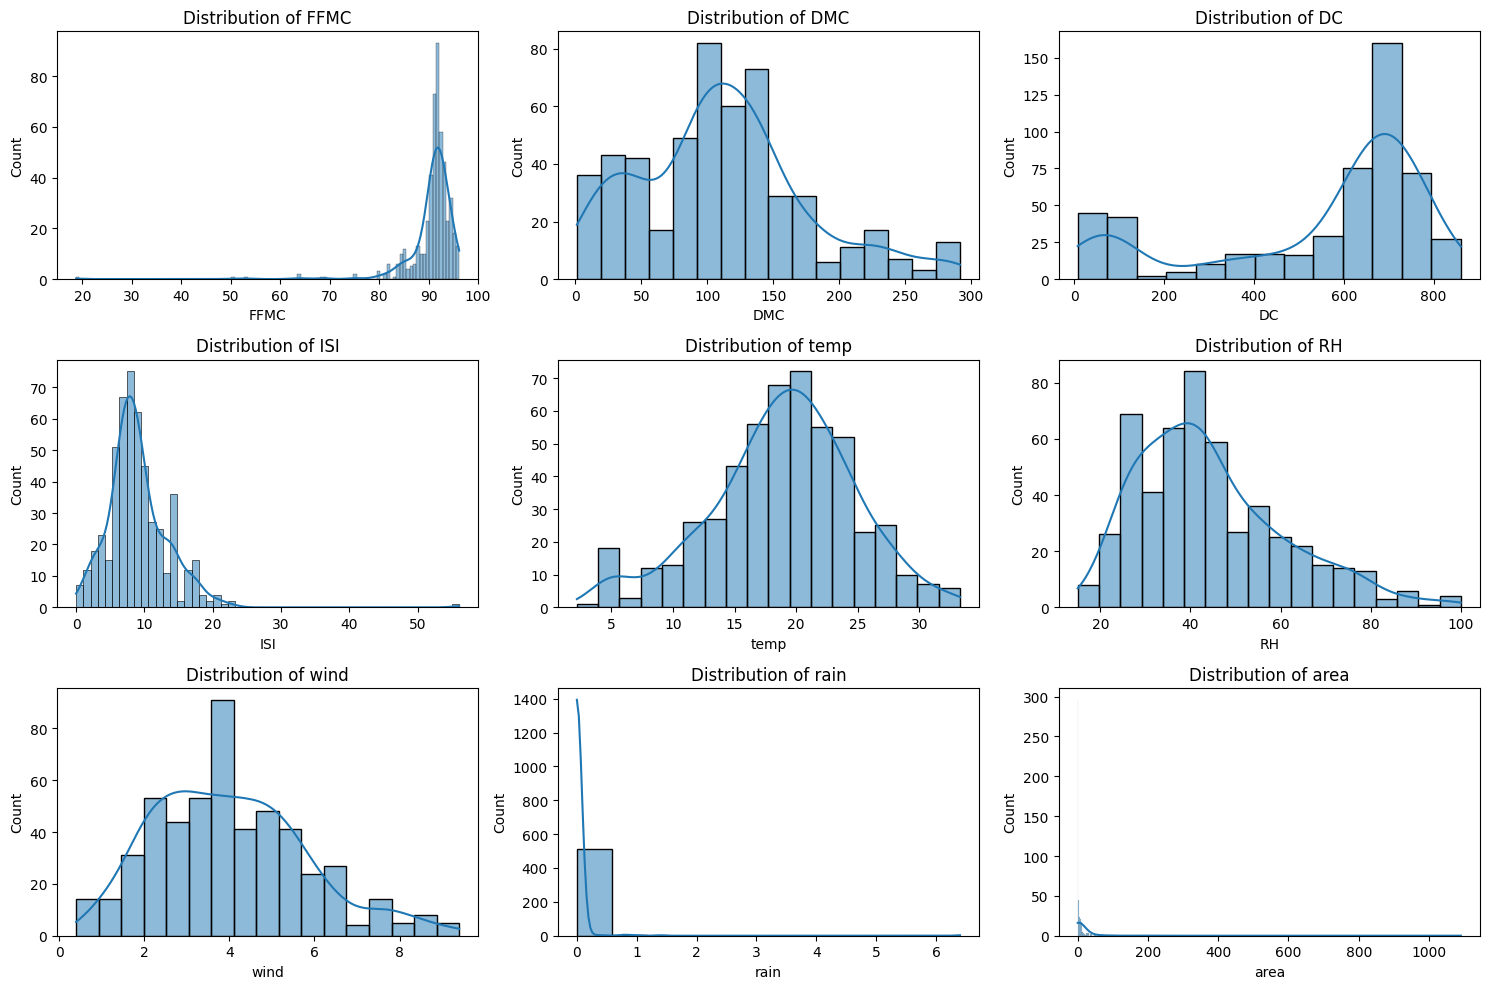

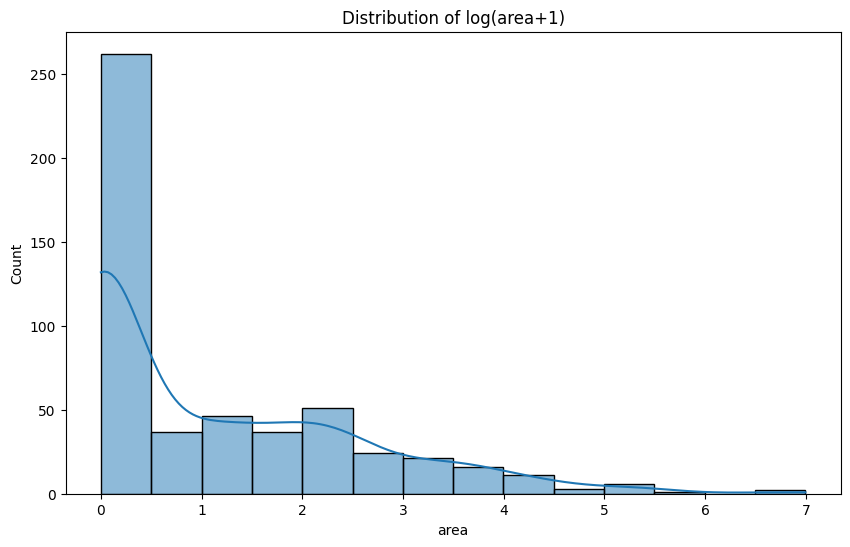

Histograms created for numerical features


In [ ]:
# 1. Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_histograms.png')
plt.show()

# Since 'area' has a skewed distribution, let's also plot it with log transformation
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['area']), kde=True)
plt.title('Distribution of log(area+1)')
plt.savefig('log_area_histogram.png')
plt.show()

print("Histograms created for numerical features")

FFMC (Fine Fuel Moisture Code):

Shape: The distribution appears to be slightly right-skewed, with a longer tail on the right side.
Center: The center of the distribution is around 90-92.
Spread: The data is spread out, with values ranging from around 75 to 98.
Outliers: There might be a few outliers on the higher end of the distribution, above 96.
DMC (Duff Moisture Code):

Shape: The distribution is roughly bell-shaped, but slightly right-skewed.
Center: The center is around 120-130.
Spread: The data is moderately spread, with values ranging from around 0 to 290.
Outliers: There are some outliers on the higher end, above 250.
DC (Drought Code):

Shape: The distribution is right-skewed, with a longer tail on the right side.
Center: The center is around 450-500.
Spread: The data is widely spread, with values ranging from around 0 to 860.
Outliers: There are noticeable outliers on the higher end, above 700.
ISI (Initial Spread Index):

Shape: The distribution is right-skewed, with a longer tail on the right side.
Center: The center is around 8-9.
Spread: The data is moderately spread, with values ranging from 0 to 18.
Outliers: There are a few outliers on the higher end, above 15.
temp (Temperature):

Shape: The distribution is roughly bell-shaped, but slightly right-skewed.
Center: The center is around 19-20 degrees Celsius.
Spread: The data is moderately spread, with values ranging from around 2 to 33 degrees Celsius.
Outliers: There might be a few outliers on the higher end, above 30 degrees Celsius.
RH (Relative Humidity):

Shape: The distribution is roughly bell-shaped, but slightly left-skewed.
Center: The center is around 40-45%.
Spread: The data is moderately spread, with values ranging from around 15% to 100%.
Outliers: There might be a few outliers on the lower end, below 20%.
wind (Wind Speed):

Shape: The distribution is roughly bell-shaped, but slightly right-skewed.
Center: The center is around 4-5 m/s.
Spread: The data is moderately spread, with values ranging from around 0 to 9 m/s.
Outliers: There might be a few outliers on the higher end, above 8 m/s.
rain (Rainfall):

Shape: The distribution is heavily right-skewed, with most values concentrated near 0 and a long tail extending to higher values.
Center: The center is near 0, indicating very little rainfall in most cases.
Spread: The data is highly skewed, with most values close to 0 and a few very high values.
Outliers: There are extreme outliers present, with rainfall values much higher than the majority of the data points. These outliers could represent rare, heavy rainfall events.
area (Burned Area):

Shape: The distribution is heavily right-skewed, with most values concentrated near 0 and a long tail extending to higher values.
Center: The center is near 0, indicating small burned areas in most cases.
Spread: The data is highly skewed, with most values close to 0 and a few very high values.
Outliers: There are extreme outliers present, with burned area values much higher than the majority of the data points. These outliers could represent large, uncontrolled fires.
log(area+1):

Shape: The distribution is closer to a normal distribution compared to the original 'area' but still slightly right-skewed.
Center: The center is around 0-1.
Spread: The data is more condensed compared to the original 'area', with values ranging from around 0 to 6.
Outliers: There are still some outliers on the higher end, above 4. The log transformation helps to reduce the impact of extreme values, making the distribution more manageable for analysis.

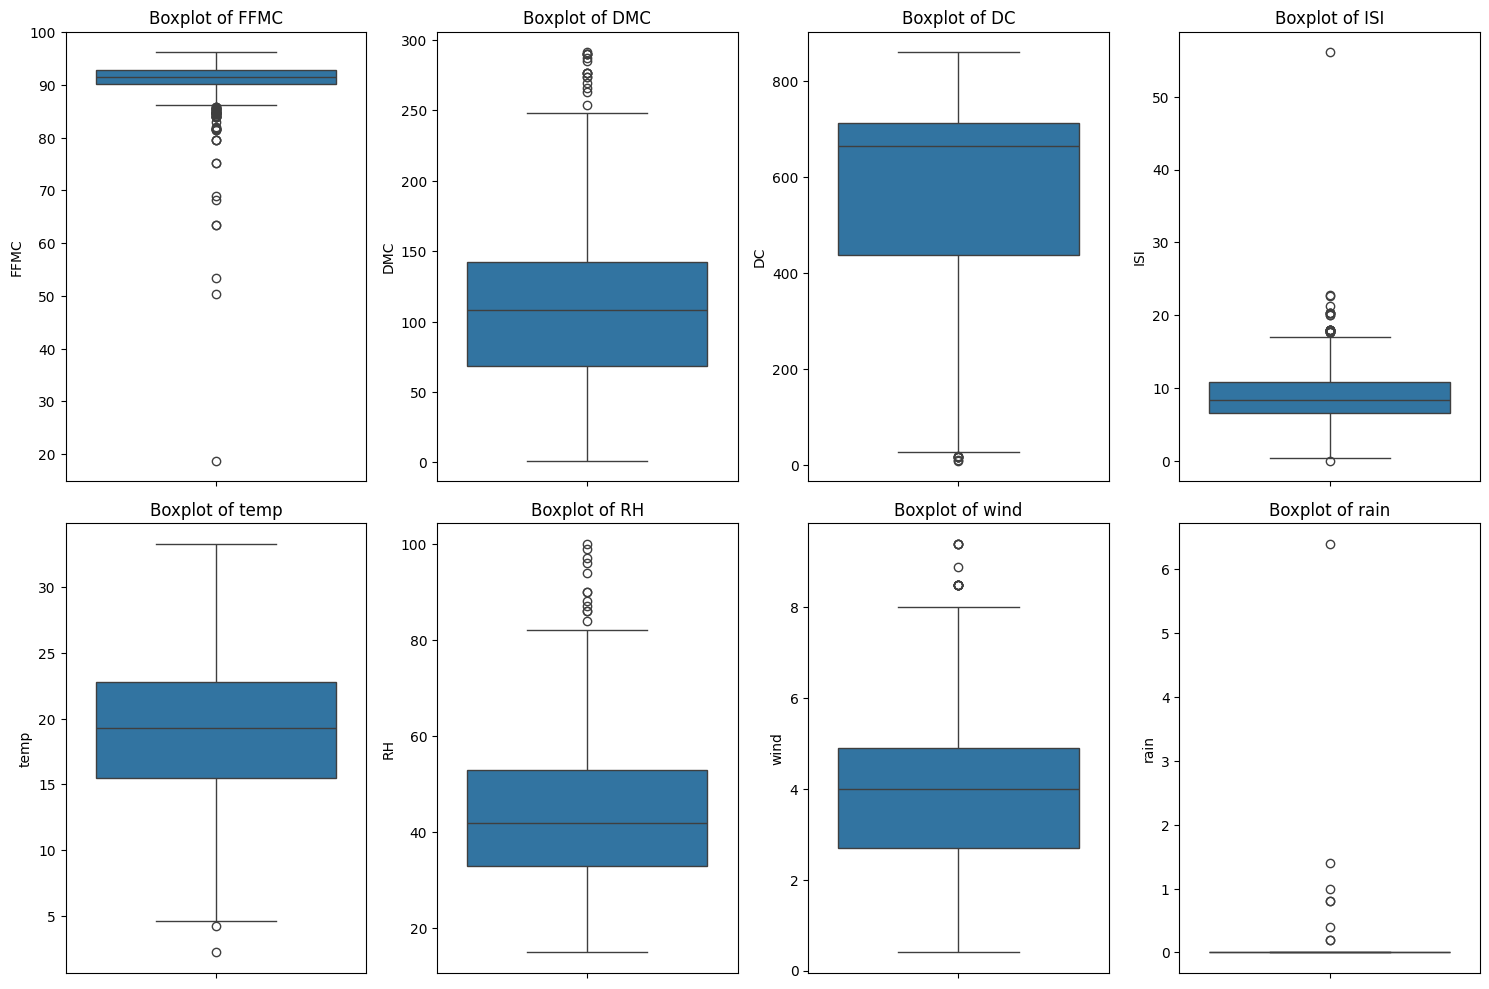

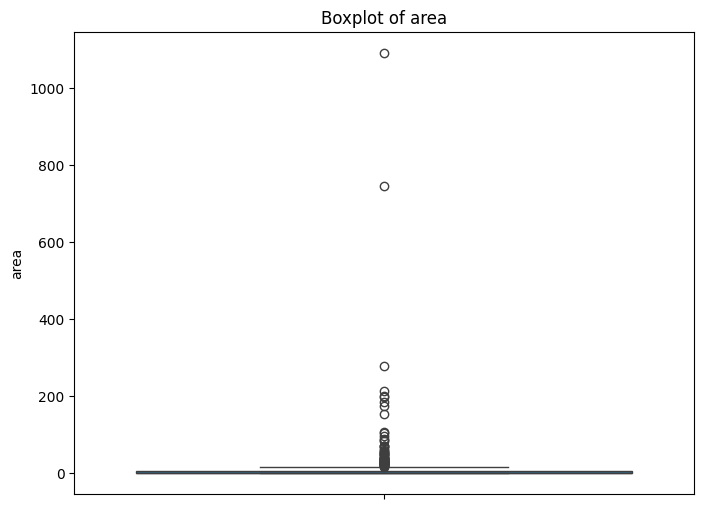

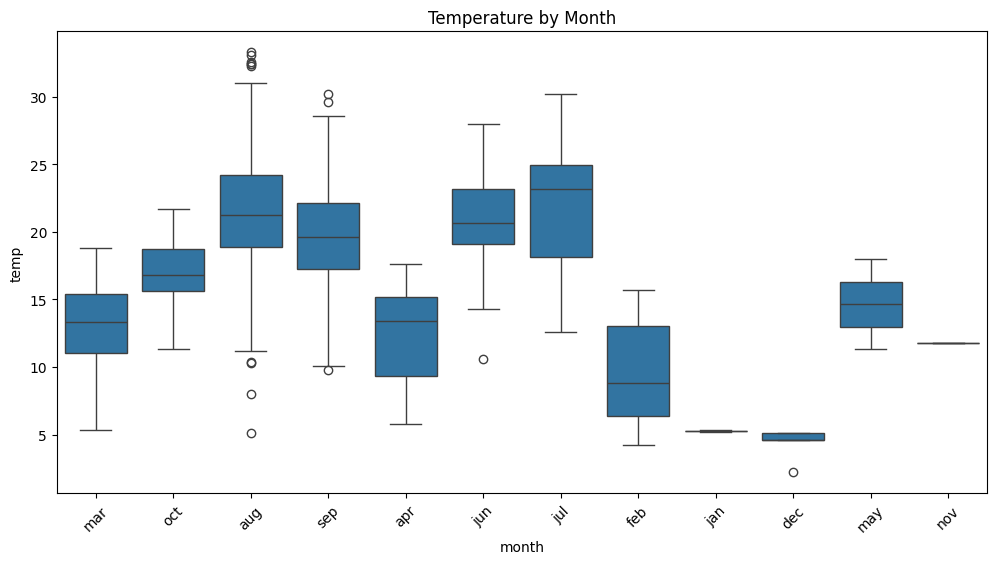

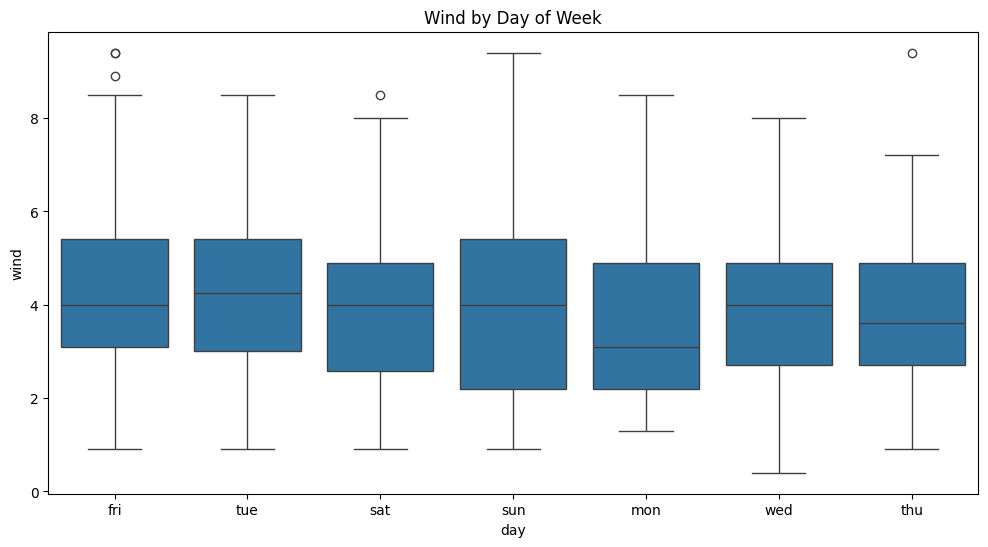

Boxplots created for numerical features


In [ ]:
# Create boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('numerical_boxplots.png')
plt.show()

# Separate boxplot for 'area' due to its scale
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['area'])
plt.title('Boxplot of area')
plt.savefig('area_boxplot.png')
plt.show()

# Boxplots by month for temperature
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='temp', data=df)
plt.title('Temperature by Month')
plt.xticks(rotation=45)
plt.savefig('temp_by_month_boxplot.png')
plt.show()

# Boxplots by day for wind
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='wind', data=df)
plt.title('Wind by Day of Week')
plt.savefig('wind_by_day_boxplot.png')
plt.show()

print("Boxplots created for numerical features")

Boxplots for Numerical Features:

FFMC, DMC, DC, ISI, temp, RH, wind, rain: These box plots provide a visual summary of the distribution of each feature, including the median, quartiles, and potential outliers.
Median: The horizontal line inside the box represents the median (middle value) of the data.
Quartiles: The box itself spans the interquartile range (IQR), which contains the middle 50% of the data. The lower and upper edges of the box represent the first (25th percentile) and third (75th percentile) quartiles, respectively.
Whiskers: The lines extending from the box (whiskers) show the range of the data, excluding outliers. They typically extend to 1.5 times the IQR from the edges of the box.
Outliers: Individual points plotted beyond the whiskers are considered potential outliers, indicating values that are significantly different from the rest of the data.
Area: This box plot is created separately due to the potentially large scale of the 'area' feature. It follows the same interpretation as the other box plots but might have a wider range and more outliers due to the skewed distribution of burned area.
Boxplots by Month for Temperature:

This box plot shows the distribution of temperature ('temp') for each month. You can observe how the temperature varies across different months, identify potential seasonal patterns, and detect any unusual temperature values within specific months.
Boxplots by Day for Wind:

This box plot displays the distribution of wind speed ('wind') for each day of the week. You can compare wind speeds across different days, identify any days with higher or lower wind speeds, and spot potential outliers for specific days.

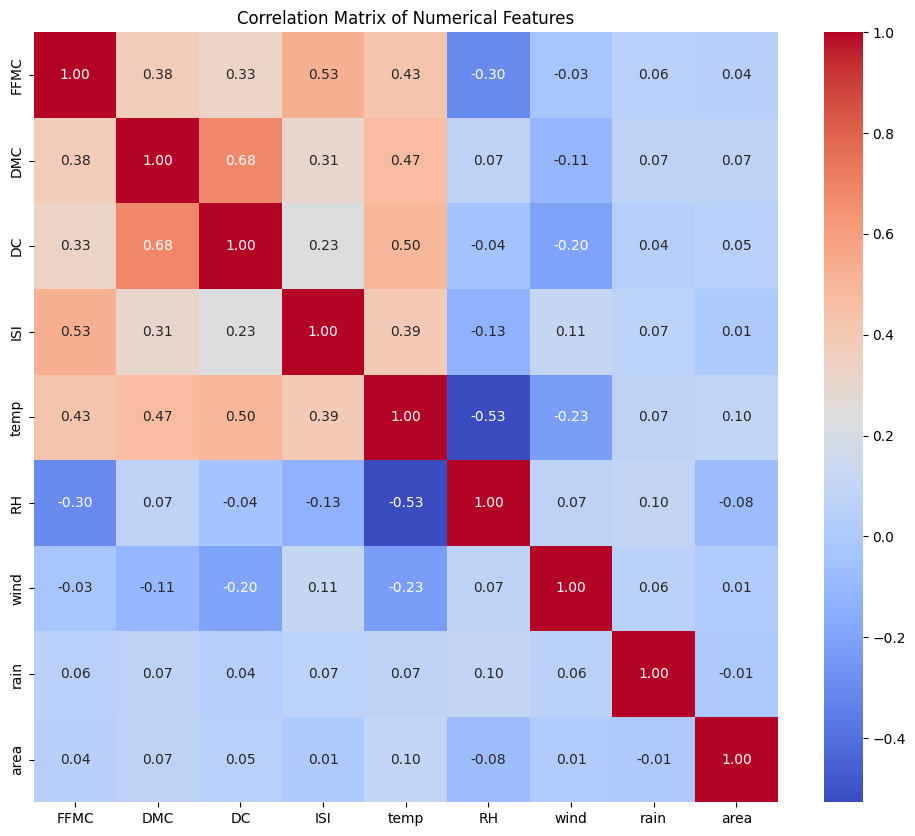

In [15]:
# Compute and visualize the correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix_heatmap.png')
plt.show()



Specific Interpretations in the Forest Fires Dataset:

Strong Positive Correlation: You might observe strong positive correlations between features like temp (temperature) and FFMC (Fine Fuel Moisture Code), indicating that higher temperatures tend to be associated with higher FFMC values.

Moderate Positive Correlations: There might be moderate positive correlations between features like DMC (Duff Moisture Code) and DC (Drought Code), suggesting that higher DMC values are somewhat associated with higher DC values.

Weak or No Correlations: You might find weak or no correlations between features like wind (wind speed) and RH (relative humidity), indicating that there is little linear relationship between these variables.
Negative Correlations: There might be negative correlations between features like RH (relative humidity) and FFMC (Fine Fuel Moisture Code), suggesting that higher humidity tends to be associated with lower FFMC values.

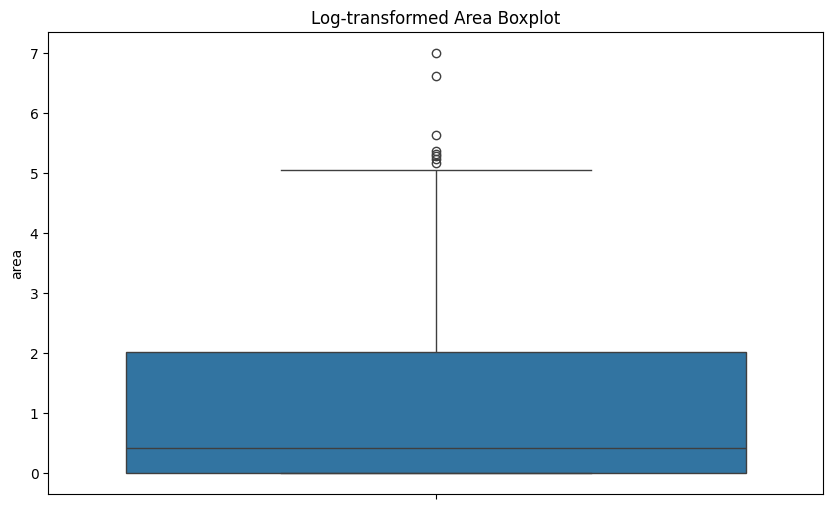

In [16]:
# Let's analyze patterns and anomalies in the dataset

# 1. Check for outliers in the 'area' variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=np.log1p(df['area']))
plt.title('Log-transformed Area Boxplot')
plt.savefig('log_area_boxplot.png')
plt.show()



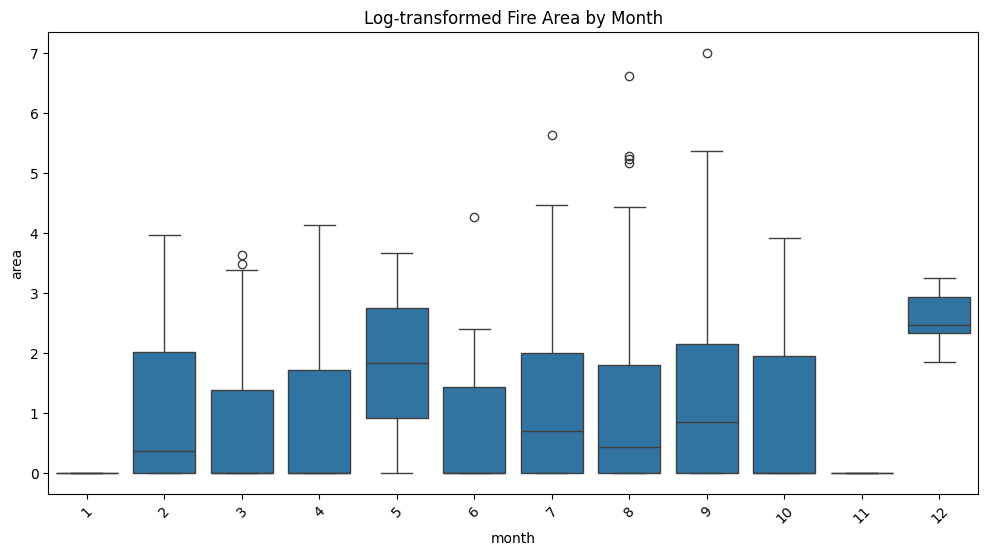

In [17]:
# 2. Analyze fire area by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y=np.log1p(df['area']), data=df)
plt.title('Log-transformed Fire Area by Month')
plt.xticks(rotation=45)
plt.savefig('area_by_month.png')
plt.show()

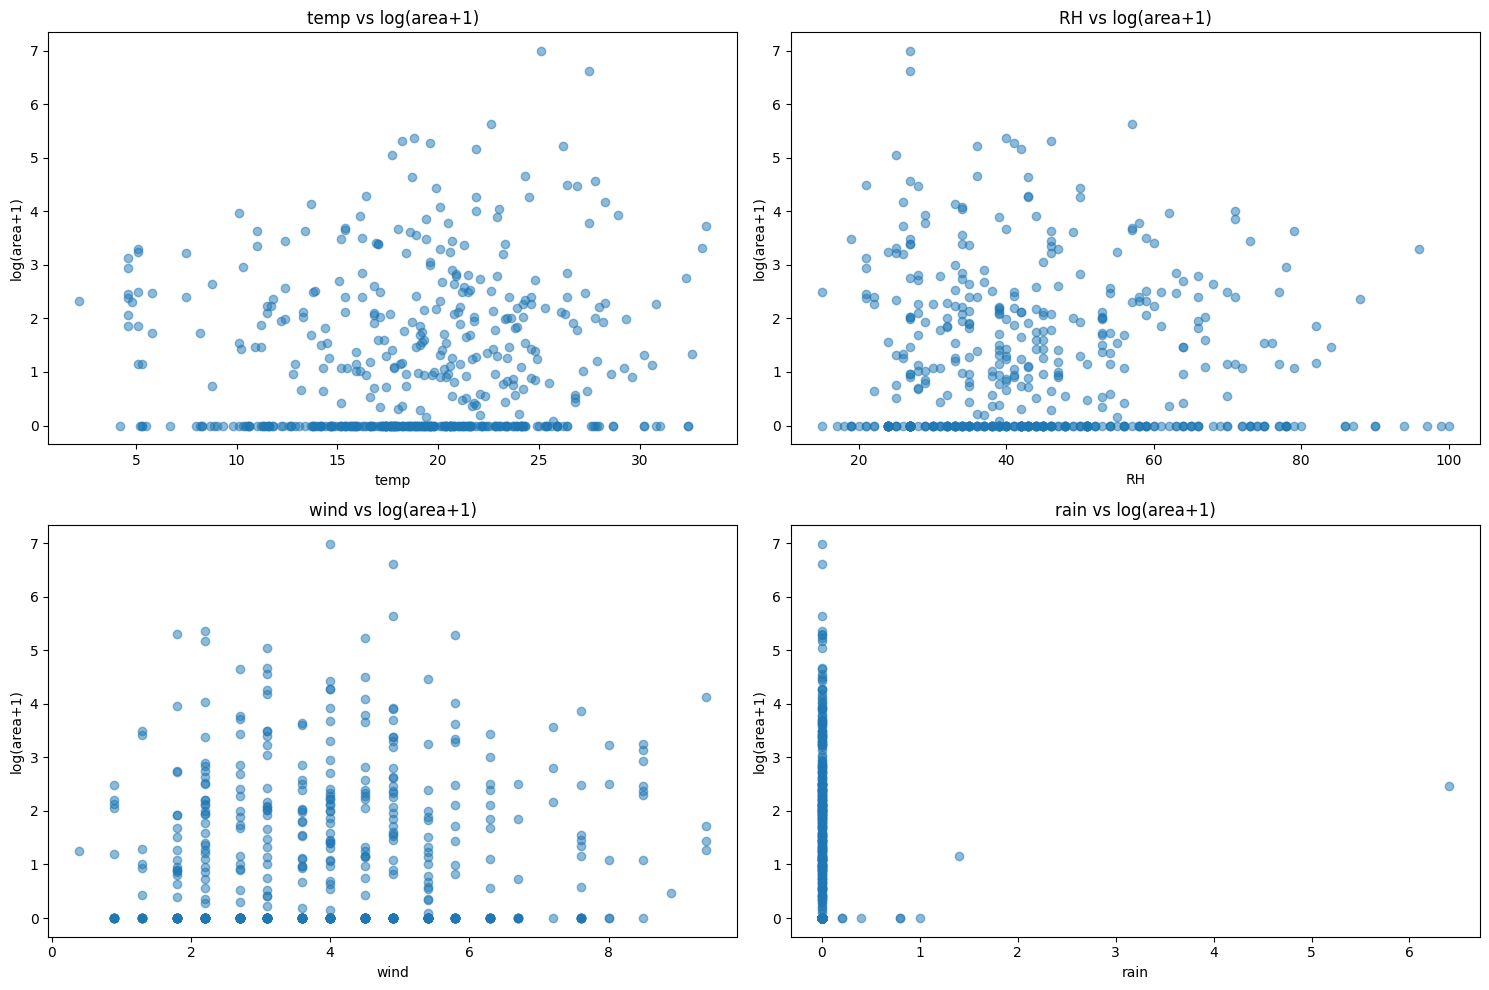

In [18]:
# 3. Analyze relationships between weather conditions and fire area
plt.figure(figsize=(15, 10))
for i, col in enumerate(['temp', 'RH', 'wind', 'rain']):
    plt.subplot(2, 2, i+1)
    plt.scatter(df[col], np.log1p(df['area']), alpha=0.5)
    plt.title(f'{col} vs log(area+1)')
    plt.xlabel(col)
    plt.ylabel('log(area+1)')
plt.tight_layout()
plt.savefig('weather_vs_area.png')
plt.show()

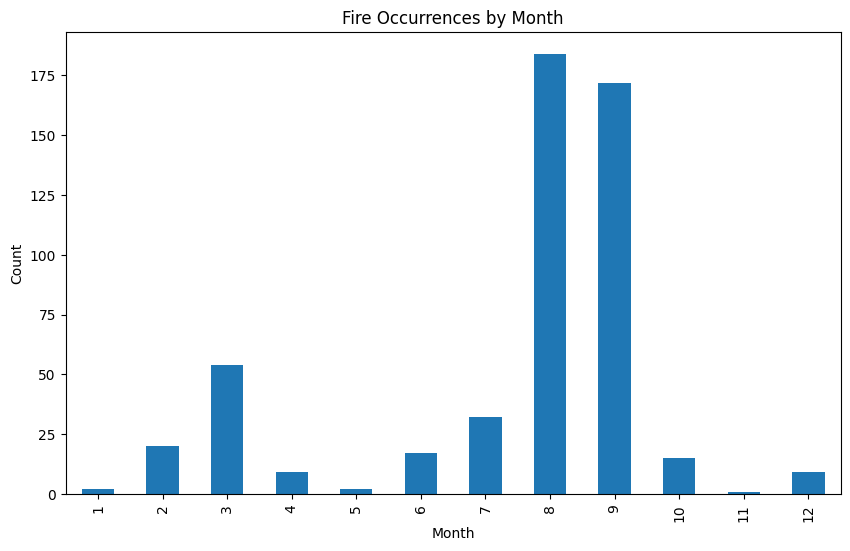

In [19]:
# 4. Identify potential patterns in fire occurrence
monthly_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('fire_by_month.png')
plt.show()

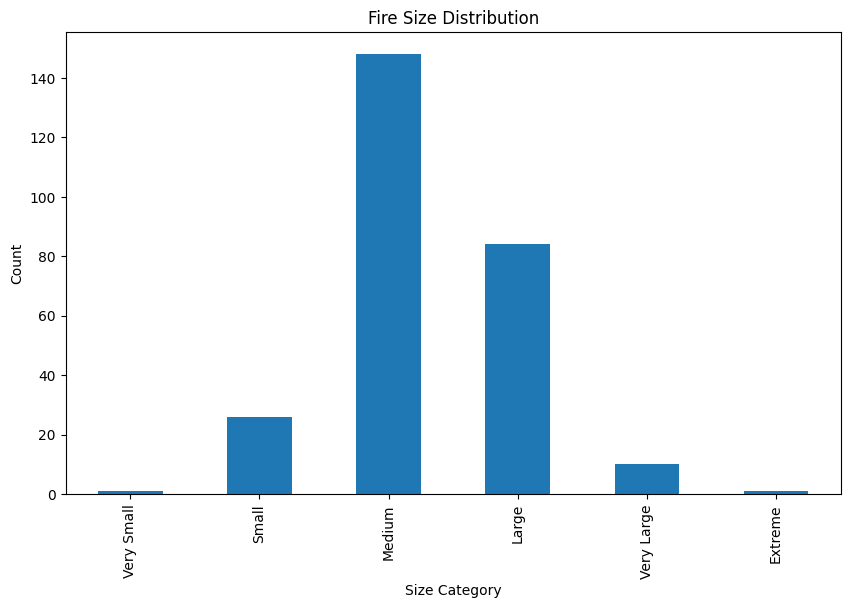

In [20]:
# 5. Analyze patterns in fire size
df['size_category'] = pd.cut(df['area'],
                            bins=[0, 0.1, 1, 10, 100, 1000, float('inf')],
                            labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large', 'Extreme'])
plt.figure(figsize=(10, 6))
df['size_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Fire Size Distribution')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.savefig('fire_size_distribution.png')
plt.show()

In [ ]:
# Import necessary libraries for machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare the data
# We'll use the features: X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain
# and the target variable 'area'.
# The columns 'month' and 'day' are categorical, we'll one-hot encode them.

features = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
target = 'area'

# Separate features and target
X_data = df[features]
y_data = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Build the column transformer: One-hot encode 'month' and 'day'
categorical_features = ['month', 'day']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', 'passthrough', numerical_features)
])

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Set up dictionary to store models and their scores
model_results = {}

# 1. Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
lr_mse, lr_r2 = evaluate_model(lr_pipeline, X_test, y_test)
model_results['Linear Regression'] = {'MSE': lr_mse, 'R2': lr_r2}

# 2. Decision Tree Regressor
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', DecisionTreeRegressor(random_state=42))])

dt_pipeline.fit(X_train, y_train)
dt_mse, dt_r2 = evaluate_model(dt_pipeline, X_test, y_test)
model_results['Decision Tree'] = {'MSE': dt_mse, 'R2': dt_r2}

# 3. Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
rf_mse, rf_r2 = evaluate_model(rf_pipeline, X_test, y_test)
model_results['Random Forest'] = {'MSE': rf_mse, 'R2': rf_r2}

# Print model results
print('Model Evaluation Results:')
for model_name, metrics in model_results.items():
    print(model_name + ': MSE = ' + str(metrics['MSE']) + ', R2 = ' + str(metrics['R2']))

print('Regression models training and evaluation completed.')

Model Evaluation Results:
Linear Regression: MSE = 11613.674532130412, R2 = 0.014768502010554352
Decision Tree: MSE = 13894.145797355768, R2 = -0.17869241464798336
Random Forest: MSE = 11949.7893229314, R2 = -0.013745374275637712
Regression models training and evaluation completed.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset (assuming df is already loaded)
# Apply log transformation to the target variable
df['log_area'] = np.log1p(df['area'])

# Feature Engineering: Cyclic encoding for month and day
# Convert 'month' and 'day' to numerical representation if they are strings
# Assuming 'month' is represented as 'jan', 'feb', 'mar', etc.
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_mapping)

# Assuming 'day' is represented as 'mon', 'tue', 'wed', etc.
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}
df['day'] = df['day'].map(day_mapping)


df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)

# Interaction features
df['wind_temp'] = df['wind'] * df['temp']
df['humidity_ratio'] = df['RH'] / (df['ISI'] + 1)  # Avoid division by zero

# Define features and target
features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
            'month_sin', 'month_cos', 'day_sin', 'day_cos', 'wind_temp', 'humidity_ratio']
target = 'log_area'

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Data preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), features)  # Standardizing numerical features
])

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Dictionary to store results
model_results = {}

# 1. Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
lr_mse, lr_r2 = evaluate_model(lr_pipeline, X_test, y_test)
model_results['Linear Regression'] = {'MSE': lr_mse, 'R2': lr_r2}

# 2. Decision Tree Regressor
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(random_state=42, max_depth=10))])
dt_pipeline.fit(X_train, y_train)
dt_mse, dt_r2 = evaluate_model(dt_pipeline, X_test, y_test)
model_results['Decision Tree'] = {'MSE': dt_mse, 'R2': dt_r2}

# 3. Random Forest Regressor with Hyperparameter Tuning
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
rf_grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
rf_mse, rf_r2 = evaluate_model(best_rf, X_test, y_test)
model_results['Random Forest'] = {'MSE': rf_mse, 'R2': rf_r2}

# Print results
print('Model Evaluation Results:')
for model_name, metrics in model_results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.4f}")

print('Regression models training and evaluation completed.')

Model Evaluation Results:
Linear Regression: MSE = 2.19, R2 = 0.0055
Decision Tree: MSE = 3.71, R2 = -0.6858
Random Forest: MSE = 2.22, R2 = -0.0114
Regression models training and evaluation completed.


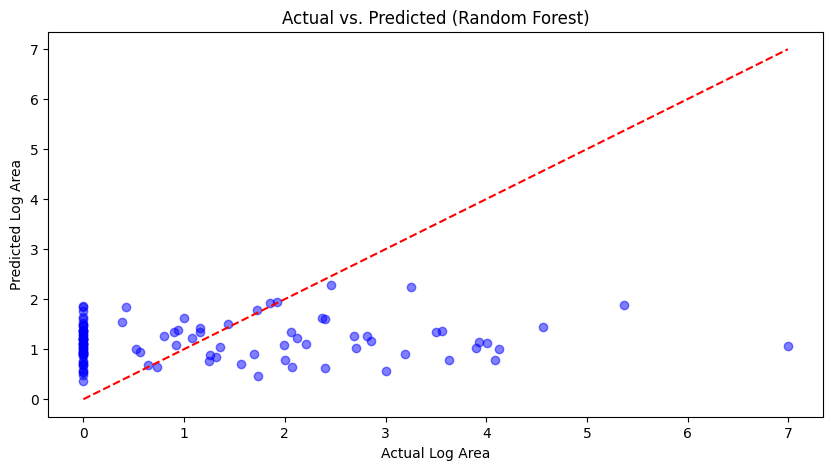

In [23]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions from the best Random Forest model
# This line was moved up to define rf_predictions before using it.
rf_predictions = best_rf.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Actual Log Area')
plt.ylabel('Predicted Log Area')
plt.title('Actual vs. Predicted (Random Forest)')
plt.show()





Actual vs. Predicted (Random Forest) What it shows: This scatter plot compares the actual log-transformed fire area (y_test) with the values predicted by your Random Forest model (rf_predictions). Interpretation: The red dashed line represents a perfect prediction where actual and predicted values are equal. Points close to the red line indicate good predictions. The closer the points cluster around the line, the better the model's performance. Points scattered far from the line represent prediction errors. The further away a point is, the larger the error for that specific data point. Overall, the closer the scatter plot resembles a straight line, the better the model's predictive accuracy. This plot allows you to visually assess how well the model captures the relationship between features and the target variable.

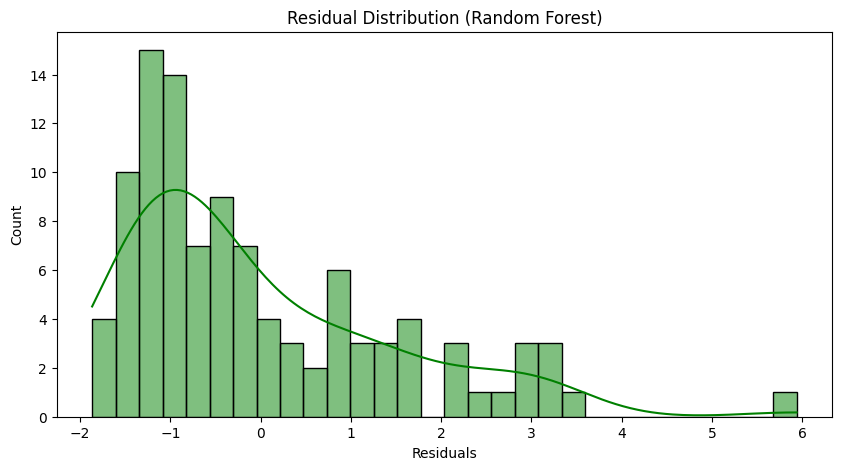

In [21]:
# Residual Plot
residuals = y_test - rf_predictions
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Residual Distribution (Random Forest)')
plt.show()


Residual Distribution (Random Forest) What it shows: This histogram (with a kernel density estimate) visualizes the distribution of residuals. Residuals are the differences between the actual values and the predicted values (y_test - rf_predictions). Interpretation: Ideally, residuals should be normally distributed and centered around zero. This indicates that the model's errors are random and unbiased. Skewness or significant deviations from a normal distribution can suggest that the model might be systematically over- or under-predicting for certain ranges of the target variable. Outliers in the residual plot can indicate data points where the model performs poorly. These points might need further investigation. This plot helps you assess the quality of the model's fit and identify potential issues with the model's assumptions.

<ipython-input-22-753e5427080a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[feature_names[i] for i in sorted_idx], y=feature_importances[sorted_idx], palette='viridis')


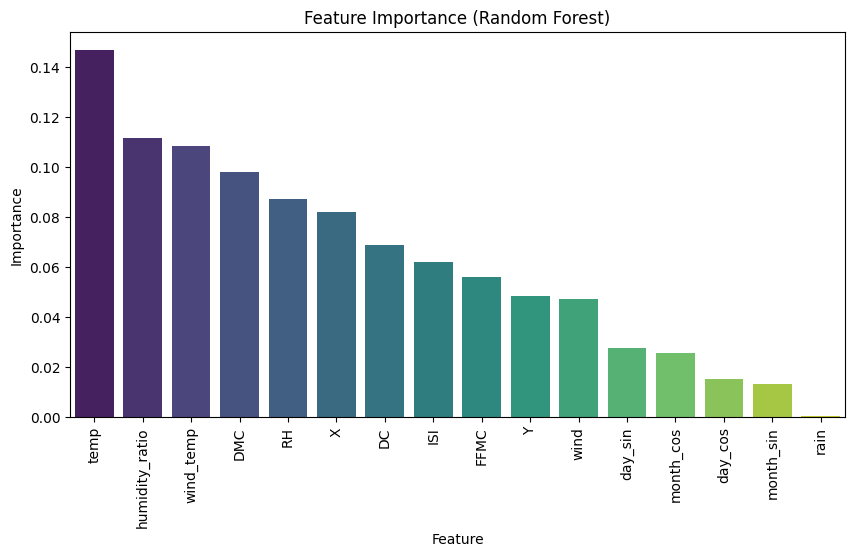

In [22]:
# Feature Importance
feature_importances = best_rf.named_steps['regressor'].feature_importances_
feature_names = features
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=[feature_names[i] for i in sorted_idx], y=feature_importances[sorted_idx], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

3. Feature Importance (Random Forest)
What it shows: This bar plot displays the relative importance of each feature in the Random Forest model.
Interpretation:
Features with longer bars have higher importance and contribute more to the model's predictions.
This plot helps you understand which features are the most influential in predicting the target variable (fire area). This information can be valuable for feature selection, understanding the underlying relationships in the data, and potentially for real-world applications (e.g., focusing fire prevention efforts on the most important factors).
In your specific case, you'll see which features like 'temp', 'RH', 'wind', 'DMC', etc., have the strongest impact on predicting the burned area of forest fires.
In summary: These visualization techniques provide different perspectives on the performance and behavior of your Random Forest model. They help you understand its predictive accuracy, identify potential weaknesses, and gain insights into the important factors driving the predictions.